# Problem Set 7

**Name:** Jake Petterson

**UNI:** jpp2135

**Due:** 4/9/18

Sample code for problem 7 -- first, use kplr to read in the data

In [1]:
import numpy as np
import kplr

# Find the target KOI.
client = kplr.API()
koi = client.koi(97.01)

# Get a list of light curve datasets.
lcs = koi.get_light_curves(short_cadence=False)

# Open the first dataset and read it
f = lcs[0].open()
hdu_data = f[1].data

time = hdu_data["time"]  # get the time of each observation
flux = hdu_data["sap_flux"] # get the flux
flux_err = hdu_data["sap_flux_err"] # get the error in the flux

f.close()

Next, import my_transit helper function and define func1 and func2, which are the two functions to be integrated to compute the flux theory curve (which is the ratio of the integral(func1)/integral(func2)).

In [2]:
import my_transit

def I(r):
    '''A Limb-darkening function'''
    mu = (1 - (r**2))**(0.5)
    return 1 - (1 - (mu**(0.5)))

def func1(r, p, z):
    return I(r) * (1 - my_transit.delta(p,r,abs(z))) * 2 * r

def func2(r, p, z):
    return I(r) * 2 * r

## Problem 1

In [3]:
# figure out correct place to extract data
r1_ix = np.where(time < 125)
r2_ix = np.where(time > 124)

# extract data between 124 and 125 t
time_extract = time[170:218]
flux_extract = flux[170:218]
flux_err_extract = flux_err[170:218]

In [4]:
time_extract

array([ 124.013216  ,  124.0336506 ,  124.054085  ,  124.0745195 ,
        124.094954  ,  124.1153885 ,  124.135823  ,  124.1562575 ,
        124.1766921 ,  124.1971265 ,  124.217561  ,  124.2379955 ,
        124.25843   ,  124.2788645 ,  124.299299  ,  124.31973359,
        124.34016799,  124.36060249,  124.38103699,  124.40147149,
        124.42190599,  124.44234049,  124.46277509,  124.48320949,
        124.50364398,  124.52407838,  124.54451298,  124.56494748,
        124.58538188,  124.60581648,  124.62625097,  124.64668547,
        124.66711987,  124.68755447,  124.70798897,  124.72842336,
        124.74885796,  124.76929246,  124.78972686,  124.81016135,
        124.83059595,  124.85103035,  124.87146485,  124.89189934,
        124.91233394,  124.93276834,  124.95320283,  124.97363743])

In [5]:
flux_extract

array([ 104186.8125   ,  104175.7265625,  104183.125    ,  104161.03125  ,
        104177.140625 ,  104169.2578125,  104180.8515625,  104151.0234375,
        104183.9609375,  104171.3359375,  104176.8671875,  104187.3046875,
        104189.578125 ,  104187.6796875,  104181.2578125,  104175.7734375,
        104179.578125 ,  104179.9296875,  104179.4296875,  104082.0390625,
        103619.6328125,  103486.2109375,  103454.1640625,  103412.9921875,
        103405.578125 ,  103392.3828125,  103434.1953125,  103486.5703125,
        103571.3125   ,  103979.7265625,  104176.4609375,  104172.515625 ,
        104163.953125 ,  104172.015625 ,  104171.5625   ,  104194.4765625,
        104180.9453125,  104157.109375 ,  104182.9765625,  104176.453125 ,
        104179.4296875,  104176.6875   ,  104181.3671875,  104176.25     ,
        104182.890625 ,  104185.484375 ,  104192.1640625,  104184.2734375], dtype=float32)

In [6]:
def normalize_loop(time, flux, flux_err):
    f_avg = np.mean(flux)
    f_std = np.std(flux)
    
    keep_ix = np.where((abs(flux - f_avg) / f_std) < 2)
    
    return time[keep_ix], flux[keep_ix], flux_err[keep_ix]

def normalize(time, flux, flux_err, n_loops):
    """ Run the normalization algorithm n_loops times, and return new
        time, flux, and flux_err arrays with the proper values dropped,
        as well as the final average flux we will use for normalization.
    """
    n = len(flux)
    print("Starting with {} data points.".format(n))
    for i in range(n_loops):
        time, flux, flux_err = normalize_loop(time, flux, flux_err)
        n_new = len(flux)
        print("On iteration {}, dropped {} data points.".format(i, n - n_new))
        n = n_new
    
    print("Done normalizing. Final # points: {}".format(len(flux)))
    final_avg = np.mean(flux)
    print("Final Avg. Flux:                  {}".format(final_avg))
    
    return time, flux, flux_err, final_avg

In [7]:
# clip some points from flux and compute the avg
NORM_LOOPS = 5
time_reduced, flux_reduced, flux_err_reduced, avg = normalize(time_extract, flux_extract, flux_err_extract, NORM_LOOPS)

Starting with 48 data points.
On iteration 0, dropped 7 data points.
On iteration 1, dropped 2 data points.
On iteration 2, dropped 2 data points.
On iteration 3, dropped 2 data points.
On iteration 4, dropped 3 data points.
Done normalizing. Final # points: 32
Final Avg. Flux:                  104179.90625


In [8]:
# normalize the values
flux_norm = flux_extract / avg
flux_err_norm = flux_err_extract / avg

print("Normalized Flux Array: {}".format(str(flux_norm)))

Normalized Flux Array: [ 1.00006628  0.99995989  1.00003088  0.9998188   0.99997348  0.99989778
  1.00000906  0.99972278  1.00003886  0.99991775  0.99997085  1.00007105
  1.00009286  1.00007463  1.00001299  0.9999603   0.99999684  1.00000024
  0.99999541  0.99906057  0.99462205  0.99334139  0.99303377  0.99263859
  0.99256742  0.99244076  0.99284208  0.99334484  0.99415827  0.99807853
  0.99996692  0.99992907  0.99984688  0.99992424  0.99991989  1.00013983
  1.00001001  0.99978119  1.00002944  0.99996686  0.99999541  0.99996912
  1.00001407  0.99996489  1.00002861  1.00005352  1.00011766  1.00004196]


In [9]:
from scipy import integrate, stats

def flux_theoretical(time, p, t_0, tau):
    """ Convert from Time to z and compute predicted transit curve """
    norm_t = (time - t_0) / tau
    flux_ratio_list = []
    for t in norm_t:
        flux_obsc, flux_obsc_err = integrate.quad(func1, 0.0, 1.0, args=(p, t))
        flux_unobsc, flux_unobsc_err = integrate.quad(func2, 0.0, 1.0, args=(p, t))
        flux_ratio_list.append(flux_obsc / flux_unobsc)
        
    return np.array(flux_ratio_list)

In [10]:
def chi_squared(flux, flux_theory, flux_err):
    s = 0
    for f, ft, fe in zip(flux, flux_theory, flux_err):
        square = ((f - ft) / fe) ** 2
        s += square
    return s

In [11]:
def p1_driver(flux_norm, flux_err_norm):
    # first guess
    PARAMS = {
        'p': 0.0775,
        'tau': 0.1,
        't_0': 124.51
    }

    # compute theoretical flux
    flux_theory = flux_theoretical(time_extract, PARAMS['p'], PARAMS['t_0'], PARAMS['tau'])

    # compute chi squared
    chi_squared_p1 = chi_squared(flux_norm, flux_theory, flux_err_norm)
    
    return flux_theory, chi_squared_p1

In [12]:
flux_theory, p1_chi_squared = p1_driver(flux_norm, flux_err_norm)
print("Chi Squared Value: {}".format(p1_chi_squared))

Chi Squared Value: 464.86291839888656


## Problem 2
##### Is this a good fit or not? To answer this question, first plot the data and the predicted transit curve.

In [13]:
import matplotlib.pyplot as plt

def plot_overlaid(time, flux1, flux2):
    fig, ax1 = plt.subplots()
    t = np.arange(0.01, 10.0, 0.01)
    s1 = np.exp(t)
    ax1.plot(time, flux1, 'b-')
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Flux Ratio (Observed Data)', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    s2 = np.sin(2 * np.pi * t)
    ax2.plot(time, flux2, 'r-')
    ax2.set_ylabel('Flux Ratio (Predicted)', color='r')
    ax2.tick_params('y', colors='r')

    plt.show()

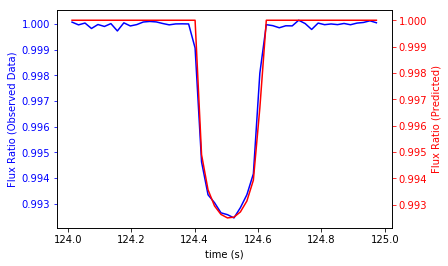

In [14]:
plot_overlaid(time_extract, flux_norm, flux_theory)

##### Before going any further, determine by eye if you think the fit is good or not.

The fit seems pretty good by eye! The red and blue are very close.

In [15]:
# calculate degrees freedom
n_points = len(flux_norm)
n_params = 3
deg_free = n_points - n_params

print("degrees freedom: {}".format(deg_free))

degrees freedom: 45


I calculated the p value using:

`http://www.socscistatistics.com/pvalues/chidistribution.aspx`

and got a value < 0.0001 (very unlikely model params).

## Problem 3

In [16]:
# vary tau parameter

params_tau = {
    'p': np.array([0.0775]),
    'tau': np.arange(0.08, 0.14, 0.01),
    't_0': np.array([124.51])
}

def find_best(param_grid):
    """ Given a parameter grid (like params, above), calculate the
        parameter setting that yields the lowest X2 value.
        Return the minimum X2 value and a list with the best parameters
        of format [p, t_0, tau].
    """
    chi_squared_list = []
    min_chi = 1000000000
    best_params = []
    
    for i, p in enumerate(param_grid['p']):
        for j, tau in enumerate(param_grid['tau']):
            for k, t_0 in enumerate(param_grid['t_0']):
                print("Testing Parameters:")
                print("\tp: {},  tau: {},  t_0: {}".format(p, tau, t_0))
                
                flux_theory = flux_theoretical(time_extract, p, t_0, tau)
                chi = chi_squared(flux_norm, flux_theory, flux_err_norm)
                print("\tGot Chi^2 = {}".format(chi))
                print()
                
                # keep track of best params
                if chi < min_chi:
                    best_params = [p, t_0, tau]
                    min_chi = chi

    return min_chi, best_params


def print_best_params(best_params):
    print("best p:   {}".format(best_params[0]))
    print("best tau:   {}".format(best_params[1]))
    print("best t_0:   {}".format(best_params[2]))

In [17]:
min_chi_tau, best_params_tau = find_best(params_tau)

print("Minimum Chi^2 Found:           {}".format(min_chi_tau))
print_best_params(best_params_tau)

Testing Parameters:
	p: 0.0775,  tau: 0.08,  t_0: 124.51
	Got Chi^2 = 5381.740069176843

Testing Parameters:
	p: 0.0775,  tau: 0.09,  t_0: 124.51
	Got Chi^2 = 1793.1025441456345

Testing Parameters:
	p: 0.0775,  tau: 0.09999999999999999,  t_0: 124.51
	Got Chi^2 = 464.8629183990215

Testing Parameters:
	p: 0.0775,  tau: 0.10999999999999999,  t_0: 124.51
	Got Chi^2 = 1838.2971156184442

Testing Parameters:
	p: 0.0775,  tau: 0.11999999999999998,  t_0: 124.51
	Got Chi^2 = 5486.847574686018

Testing Parameters:
	p: 0.0775,  tau: 0.12999999999999998,  t_0: 124.51
	Got Chi^2 = 9571.772747813744

Testing Parameters:
	p: 0.0775,  tau: 0.13999999999999996,  t_0: 124.51
	Got Chi^2 = 14522.28618451272

Minimum Chi^2 Found:           464.8629183990215
best p:   0.0775
best tau:   124.51
best t_0:   0.09999999999999999


## Problem 4

In [19]:
params_p4 = {
    'p': np.arange(0.05, 0.09, 0.005),
    'tau': np.arange(0.08, 0.14, 0.005),
    't_0': np.arange(124.4, 125.5, 0.02)
}

min_chi_p4, best_params_p4 = find_best(params_p4)

print("Minimum Chi^2 Found:           {}".format(min_chi_tau))
print_best_params(best_params_tau)

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.4
	Got Chi^2 = 50737.70080045745

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.42
	Got Chi^2 = 44680.12231396107

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.44
	Got Chi^2 = 38536.67770106835

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.46
	Got Chi^2 = 32545.17499125555

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.47999999999999
	Got Chi^2 = 27650.499254948998

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.49999999999999
	Got Chi^2 = 25208.750246060186

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.51999999999998
	Got Chi^2 = 25177.532096094914

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.53999999999998
	Got Chi^2 = 28383.384250834242

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.55999999999997
	Got Chi^2 = 33597.94554913207

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.57999999999997
	Got Chi^2 = 39454.8334849468

Testing Parameters:
	p: 0.05,  tau: 0.08,  t_0: 124.5999

	Got Chi^2 = 60221.933740541564

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.03999999999988
	Got Chi^2 = 59039.95284401065

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.05999999999987
	Got Chi^2 = 58182.54414917557

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.07999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.085,  t_0: 125.21999999999984

	Got Chi^2 = 41367.99249870251

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.44
	Got Chi^2 = 35078.79267032376

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.46
	Got Chi^2 = 29172.29591545794

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.47999999999999
	Got Chi^2 = 24005.99950254536

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.49999999999999
	Got Chi^2 = 20575.26250109073

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.51999999999998
	Got Chi^2 = 22403.98693460243

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.53999999999998
	Got Chi^2 = 26896.64254298915

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.55999999999997
	Got Chi^2 = 32263.91021839265

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.57999999999997
	Got Chi^2 = 38109.479117240175

Testing Parameters:
	p: 0.05,  tau: 0.09500000000000001,  t_0: 124.599999999999

	Got Chi^2 = 68415.68424855644

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.83999999999992
	Got Chi^2 = 68383.02121374282

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.85999999999991
	Got Chi^2 = 68480.70961896276

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.87999999999991
	Got Chi^2 = 68642.95108250821

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.8999999999999
	Got Chi^2 = 68213.74741651611

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.9199999999999
	Got Chi^2 = 67360.68589011101

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.9399999999999
	Got Chi^2 = 66266.32040684621

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.9599999999999
	Got Chi^2 = 65048.445163184675

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  t_0: 124.97999999999989
	Got Chi^2 = 63739.496195329746

Testing Parameters:
	p: 0.05,  tau: 0.10000000000000002,  


Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.10500000000000002,  t_0: 125.4399999999998
	Got Chi


Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.55999999999997
	Got Chi^2 = 28886.454468763677

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.57999999999997
	Got Chi^2 = 34589.31732604346

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.59999999999997
	Got Chi^2 = 40595.28227085873

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.61999999999996
	Got Chi^2 = 46739.225979418254

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.63999999999996
	Got Chi^2 = 52763.76971578313

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.65999999999995
	Got Chi^2 = 58237.56243600006

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.67999999999995
	Got Chi^2 = 63121.239497690796

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.69999999999995
	Got Chi^2 = 67075.93473716799

Testing Parameters:
	p: 0.05,  tau: 0.11500000000000003,  t_0: 124.71999999999994
	G

	Got Chi^2 = 69495.92178284781

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 124.9199999999999
	Got Chi^2 = 68460.64907397982

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 124.9399999999999
	Got Chi^2 = 67312.79178158735

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 124.9599999999999
	Got Chi^2 = 66061.81714635863

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 124.97999999999989
	Got Chi^2 = 64772.51945052474

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 124.99999999999989
	Got Chi^2 = 63451.77829113706

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 125.01999999999988
	Got Chi^2 = 62176.6074626557

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 125.03999999999988
	Got Chi^2 = 60930.89739137227

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_0: 125.05999999999987
	Got Chi^2 = 59785.20262461434

Testing Parameters:
	p: 0.05,  tau: 0.12000000000000004,  t_

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.05,  tau: 0.12500000000000006,  t_0: 125.47999999999979
	Got Chi^2

	Got Chi^2 = 31322.106421838525

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.59999999999997
	Got Chi^2 = 37221.13509402337

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.61999999999996
	Got Chi^2 = 43301.83906237058

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.63999999999996
	Got Chi^2 = 49247.38473439498

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.65999999999995
	Got Chi^2 = 55099.851358036016

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.67999999999995
	Got Chi^2 = 60513.16162900592

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.69999999999995
	Got Chi^2 = 65278.772605281316

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.71999999999994
	Got Chi^2 = 69121.03810077622

Testing Parameters:
	p: 0.05,  tau: 0.13500000000000006,  t_0: 124.73999999999994
	Got Chi^2 = 71055.45031543689

Testing Parameters:
	p: 0.05,  tau: 0.135000000000000

	Got Chi^2 = 68333.23609603675

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 124.9599999999999
	Got Chi^2 = 67082.17393475454

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 124.97999999999989
	Got Chi^2 = 65782.80194883198

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 124.99999999999989
	Got Chi^2 = 64484.53379743161

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 125.01999999999988
	Got Chi^2 = 63184.97845288255

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 125.03999999999988
	Got Chi^2 = 61950.85775132647

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 125.05999999999987
	Got Chi^2 = 60760.97282839934

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 125.07999999999987
	Got Chi^2 = 59677.71137084397

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007,  t_0: 125.09999999999987
	Got Chi^2 = 58750.79336097241

Testing Parameters:
	p: 0.05,  tau: 0.14000000000000007, 

	Got Chi^2 = 18715.58905663576

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.53999999999998
	Got Chi^2 = 23158.056764346096

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.55999999999997
	Got Chi^2 = 29675.615798234947

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.57999999999997
	Got Chi^2 = 36923.35138086311

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.59999999999997
	Got Chi^2 = 44335.322797967296

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.61999999999996
	Got Chi^2 = 51743.61528811951

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.63999999999996
	Got Chi^2 = 58564.51852518427

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.65999999999995
	Got Chi^2 = 64655.354608249545

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.67999999999995
	Got Chi^2 = 69221.52123801477

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.69999999999995
	Got Chi^2 = 70464.52423004569

Testing Parameters:
	p: 0.055,  tau: 0.085,  t_0: 124.7

	Got Chi^2 = 59956.868054930645

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.05999999999987
	Got Chi^2 = 58624.41410798616

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.07999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000000000001,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.09000000

	Got Chi^2 = 40044.49226128544

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.44
	Got Chi^2 = 32518.186817624675

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.46
	Got Chi^2 = 25427.28927730684

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.47999999999999
	Got Chi^2 = 19153.797024913227

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.49999999999999
	Got Chi^2 = 14623.728296984627

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.51999999999998
	Got Chi^2 = 15682.02672521371

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.53999999999998
	Got Chi^2 = 20873.12922769402

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.55999999999997
	Got Chi^2 = 27304.19790493717

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.57999999999997
	Got Chi^2 = 34264.75053724884

Testing Parameters:
	p: 0.055,  tau: 0.10000000000000002,  t_0: 124.5

	p: 0.055,  tau: 0.10500000000000002,  t_0: 124.9199999999999
	Got Chi^2 = 71873.88477407393

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 124.9399999999999
	Got Chi^2 = 70232.18927186487

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 124.9599999999999
	Got Chi^2 = 68430.78004518291

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 124.97999999999989
	Got Chi^2 = 66514.01946545254

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 124.99999999999989
	Got Chi^2 = 64601.576872038284

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 125.01999999999988
	Got Chi^2 = 62704.02459735927

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 125.03999999999988
	Got Chi^2 = 60920.341148775464

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 125.05999999999987
	Got Chi^2 = 59341.37036365632

Testing Parameters:
	p: 0.055,  tau: 0.10500000000000002,  t_0: 125.07999999999987
	Got Chi^2 = 58206

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.11000000000000003,  t_0: 125.47999999999979
	

	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.71999999999994
	Got Chi^2 = 74766.04486425113

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.73999999999994
	Got Chi^2 = 75823.66406998957

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.75999999999993
	Got Chi^2 = 75891.29432287675

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.77999999999993
	Got Chi^2 = 75958.6834384707

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.79999999999993
	Got Chi^2 = 76079.590040594

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.81999999999992
	Got Chi^2 = 76168.14680069423

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.83999999999992
	Got Chi^2 = 76273.3748922257

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.85999999999991
	Got Chi^2 = 76252.02159549344

Testing Parameters:
	p: 0.055,  tau: 0.12000000000000004,  t_0: 124.87999999999991
	Got Chi^2 = 75755.32

	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.12500000000000006,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.055,  tau: 0.125000000

	Got Chi^2 = 40582.45257305975

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.42
	Got Chi^2 = 33111.935410921214

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.44
	Got Chi^2 = 26073.76558705741

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.46
	Got Chi^2 = 19792.548088807984

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.47999999999999
	Got Chi^2 = 16311.260714623693

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.49999999999999
	Got Chi^2 = 15175.547776784037

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.51999999999998
	Got Chi^2 = 15376.797097474022

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.53999999999998
	Got Chi^2 = 17288.582409685143

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.55999999999997
	Got Chi^2 = 22523.988468564537

Testing Parameters:
	p: 0.055,  tau: 0.13500000000000006,  t_0: 124.579999999

	Got Chi^2 = 77775.39450482605

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.75999999999993
	Got Chi^2 = 78755.18445659209

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.77999999999993
	Got Chi^2 = 78829.12254101991

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.79999999999993
	Got Chi^2 = 78949.13419560951

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.81999999999992
	Got Chi^2 = 79129.20693926235

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.83999999999992
	Got Chi^2 = 79231.00094046713

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.85999999999991
	Got Chi^2 = 78807.43986026649

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.87999999999991
	Got Chi^2 = 77648.92411816817

Testing Parameters:
	p: 0.055,  tau: 0.14000000000000007,  t_0: 124.8999999999999
	Got Chi^2 = 76276.5073898407

Testing Parameters:
	p: 0.055,  tau: 0.14000000000

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.08,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Param

	Got Chi^2 = 76443.9022810409

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.75999999999993
	Got Chi^2 = 76558.74555503654

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.77999999999993
	Got Chi^2 = 76602.88995773357

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.79999999999993
	Got Chi^2 = 76657.13764659983

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.81999999999992
	Got Chi^2 = 76546.41266063144

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.83999999999992
	Got Chi^2 = 76580.22779791779

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.85999999999991
	Got Chi^2 = 76810.29103019327

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.87999999999991
	Got Chi^2 = 76977.53870313677

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  t_0: 124.8999999999999
	Got Chi^2 = 77082.85248179306

Testing Parameters:
	p: 0.06,  tau: 0.09000000000000001,  

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.09500000000000001,  t_0: 125.33999999999982
	Got C

	Got Chi^2 = 23735.55914121663

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.57999999999997
	Got Chi^2 = 32084.96097234372

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.59999999999997
	Got Chi^2 = 40923.924392891626

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.61999999999996
	Got Chi^2 = 49786.68113025233

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.63999999999996
	Got Chi^2 = 58606.43182038487

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.65999999999995
	Got Chi^2 = 66559.53900151908

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.67999999999995
	Got Chi^2 = 73237.29377759839

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.69999999999995
	Got Chi^2 = 78378.03398297452

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002,  t_0: 124.71999999999994
	Got Chi^2 = 79927.84588064368

Testing Parameters:
	p: 0.06,  tau: 0.10500000000000002

	Got Chi^2 = 73114.49563709491

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 124.97999999999989
	Got Chi^2 = 70440.39293741343

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 124.99999999999989
	Got Chi^2 = 67751.72801426753

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 125.01999999999988
	Got Chi^2 = 65120.51870423424

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 125.03999999999988
	Got Chi^2 = 62625.91860358951

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 125.05999999999987
	Got Chi^2 = 60402.08754393836

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 125.07999999999987
	Got Chi^2 = 58674.074959891885

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11000000000000003

	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.11500000000000003,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.12000000000000004,  t_0: 124.4
	Got Chi^2 = 44959.69486221108

Testing Par

	Got Chi^2 = 46330.21436576829

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.63999999999996
	Got Chi^2 = 55140.7931117231

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.65999999999995
	Got Chi^2 = 63496.654033102175

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.67999999999995
	Got Chi^2 = 71185.813923936

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.69999999999995
	Got Chi^2 = 77757.01695443546

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.71999999999994
	Got Chi^2 = 82674.46223368935

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.73999999999994
	Got Chi^2 = 84161.3646215443

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.75999999999993
	Got Chi^2 = 84227.74966797754

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t_0: 124.77999999999993
	Got Chi^2 = 84296.33945055926

Testing Parameters:
	p: 0.06,  tau: 0.12500000000000006,  t

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 124.97999999999989
	Got Chi^2 = 72567.14725670687

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 124.99999999999989
	Got Chi^2 = 69866.67675844784

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.01999999999988
	Got Chi^2 = 67221.32838065471

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.03999999999988
	Got Chi^2 = 64681.55276967929

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.05999999999987
	Got Chi^2 = 62307.00203981823

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.07999999999987
	Got Chi^2 = 60213.102635167335

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.09999999999987
	Got Chi^2 = 58602.80057792315

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06,  tau: 0.13000000000000006,  t_0: 125.13999999999986
	Got 

/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


	Got Chi^2 = 20247.80817833668

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.57999999999997
	Got Chi^2 = 28070.030944983388

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.59999999999997
	Got Chi^2 = 36542.7502741594

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.61999999999996
	Got Chi^2 = 45295.82754783001

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.63999999999996
	Got Chi^2 = 53864.828902046844

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.65999999999995
	Got Chi^2 = 62290.94004953698

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.67999999999995
	Got Chi^2 = 70108.02108733912

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.69999999999995
	Got Chi^2 = 76989.21345035572

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006,  t_0: 124.71999999999994
	Got Chi^2 = 82541.41179004835

Testing Parameters:
	p: 0.06,  tau: 0.13500000000000006

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 124.9199999999999
	Got Chi^2 = 81650.66188022858

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 124.9399999999999
	Got Chi^2 = 79138.2991328794

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 124.9599999999999
	Got Chi^2 = 76533.15068635008

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 124.97999999999989
	Got Chi^2 = 73837.79416442473

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 124.99999999999989
	Got Chi^2 = 71139.8997483948

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 125.01999999999988
	Got Chi^2 = 68453.92970992021

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 125.03999999999988
	Got Chi^2 = 65893.24332799728

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 125.05999999999987
	Got Chi^2 = 63448.62140909861

Testing Parameters:
	p: 0.06,  tau: 0.14000000000000007,  t_0: 125.07999999999987
	Got Chi^2 

	Got Chi^2 = 42773.77645008254

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.44
	Got Chi^2 = 32556.457868191363

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.46
	Got Chi^2 = 22749.87104139253

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.47999999999999
	Got Chi^2 = 14367.623578379058

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.49999999999999
	Got Chi^2 = 9168.547534400906

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.51999999999998
	Got Chi^2 = 10128.981126490879

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.53999999999998
	Got Chi^2 = 16367.581058270696

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.55999999999997
	Got Chi^2 = 25460.914349517152

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.57999999999997
	Got Chi^2 = 35572.02495881325

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.59999999999997
	Got Chi^2 = 45918.05920100091

Testing Parameters:
	p: 0.065,  tau: 0.085,  t_0: 124.61999999999996
	Got Chi^

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 124.97999999999989
	Got Chi^2 = 72107.74510516883

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 124.99999999999989
	Got Chi^2 = 68402.36799699444

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.01999999999988
	Got Chi^2 = 64805.49973449737

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.03999999999988
	Got Chi^2 = 61546.976736657496

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.05999999999987
	Got Chi^2 = 58978.68445066906

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.07999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.09000000000000001,  t_0: 125.13999999999

	p: 0.065,  tau: 0.09500000000000001,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.09500000000000001,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.09500000000000001,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.10000000000000002,  t_0: 124.4
	Got Chi^2 = 51172.8206284436

Testing Parameters:
	p: 0.065,  tau: 0.10000000000000002,  t_0: 124.42
	Got Chi^2 = 40834.266543884274

Testing Parameters:
	p: 0.065,  tau: 0.10000000000000002,  t_0: 124.44
	Got Chi^2 = 30370.33185674375

Testing Parameters:
	p: 0.065,  tau: 0.10000000000000002,  t_0: 124.46
	Got Chi^2 = 20524.07073633861

Testing Parameters:
	p: 0.065,  tau: 0.10000000000000002,  t_0: 124.47999999999999
	Got Chi^2 = 11835.040001928686

Testing Parameters:
	p: 0.065,  tau: 0.10000000000000002,  t_0: 124.49999999999999
	Got Chi^2 = 5607.58173891762

Testing Parameters:
	p: 0.065,  tau:

	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.71999999999994
	Got Chi^2 = 88233.91711867899

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.73999999999994
	Got Chi^2 = 88294.78080841244

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.75999999999993
	Got Chi^2 = 88376.95910478808

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.77999999999993
	Got Chi^2 = 88554.27664022034

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.79999999999993
	Got Chi^2 = 88602.6845047796

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.81999999999992
	Got Chi^2 = 88680.11294577077

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.83999999999992
	Got Chi^2 = 88613.67831938848

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.85999999999991
	Got Chi^2 = 88773.85355745125

Testing Parameters:
	p: 0.065,  tau: 0.10500000000000002,  t_0: 124.87999999999991
	Got Chi^2 = 89060


Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.11000000000000003,  t_0: 125.27999999999

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.57999999999997
	Got Chi^2 = 30207.883026729847

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.59999999999997
	Got Chi^2 = 40251.71424174213

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.61999999999996
	Got Chi^2 = 50699.304532738824

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.63999999999996
	Got Chi^2 = 60939.667888585325

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.65999999999995
	Got Chi^2 = 70466.72692330909

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.67999999999995
	Got Chi^2 = 79152.77782395827

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.69999999999995
	Got Chi^2 = 86432.88993239301

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.71999999999994
	Got Chi^2 = 91323.08624802443

Testing Parameters:
	p: 0.065,  tau: 0.12000000000000004,  t_0: 124.739999999

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 124.9599999999999
	Got Chi^2 = 81008.3485438715

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 124.97999999999989
	Got Chi^2 = 77306.40834417962

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 124.99999999999989
	Got Chi^2 = 73549.99931889976

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 125.01999999999988
	Got Chi^2 = 69895.18463354545

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 125.03999999999988
	Got Chi^2 = 66370.97285942212

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 125.05999999999987
	Got Chi^2 = 63119.64776657107

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 125.07999999999987
	Got Chi^2 = 60297.872829178516

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 125.09999999999987
	Got Chi^2 = 58279.146027540344

Testing Parameters:
	p: 0.065,  tau: 0.12500000000000006,  t_0: 125.119999999999

	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.13000000000000006,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.065,  tau: 0.1350000000000

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.63999999999996
	Got Chi^2 = 57637.67959580853

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.65999999999995
	Got Chi^2 = 67642.93700027683

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.67999999999995
	Got Chi^2 = 77074.4349798904

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.69999999999995
	Got Chi^2 = 85499.22431838461

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.71999999999994
	Got Chi^2 = 92518.5939937397

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.73999999999994
	Got Chi^2 = 97129.31585926676

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.75999999999993
	Got Chi^2 = 98427.03720382186

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.77999999999993
	Got Chi^2 = 98516.60829667332

Testing Parameters:
	p: 0.065,  tau: 0.14000000000000007,  t_0: 124.79999999999993

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 124.97999999999989
	Got Chi^2 = 75303.91558264142

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 124.99999999999989
	Got Chi^2 = 70206.11407490689

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.01999999999988
	Got Chi^2 = 65331.3915838272

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.03999999999988
	Got Chi^2 = 61048.042634259364

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.05999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.07999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.08,  t_0: 125.13999999999986
	Got C

	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.085,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.4
	Got Chi^2 = 55638.65587257786

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.42
	Got Chi^2 = 43617.10841443807

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.44
	Got Chi^2 = 31449.612559199515

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.46
	Got Chi^2 = 19996.90266980049

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.47999999999999
	Got Chi^2 = 10089.493124124496

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.49999999999999
	Got Chi^2 = 3714.3758583943036

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09000000000000001,  t_0: 124.51999999999998
	Got Chi^2 = 6625.1224987269

	Got Chi^2 = 36664.32995309691

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.59999999999997
	Got Chi^2 = 48501.21206894368

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.61999999999996
	Got Chi^2 = 60331.637069497774

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.63999999999996
	Got Chi^2 = 71630.32216454942

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.65999999999995
	Got Chi^2 = 81643.88536197226

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.67999999999995
	Got Chi^2 = 89575.85687423278

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.69999999999995
	Got Chi^2 = 93592.44913133267

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.09500000000000001,  t_0: 124.71999999999994
	Got Chi^2 = 94450.9277110289

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.095000000000

	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.79999999999993
	Got Chi^2 = 97582.02066536459

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.81999999999992
	Got Chi^2 = 97640.86548583167

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.83999999999992
	Got Chi^2 = 97568.90319674493

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.85999999999991
	Got Chi^2 = 97737.25514007523

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.87999999999991
	Got Chi^2 = 98012.756096247

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.8999999999999
	Got Chi^2 = 96470.30997864142

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.9199999999999
	Got Chi^2 = 93145.18286816742

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10000000000000002,  t_0: 124.9399999999999
	Got Chi^2 = 88926.212724

	Got Chi^2 = 74833.95942190684

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.01999999999988
	Got Chi^2 = 69900.72336481915

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.03999999999988
	Got Chi^2 = 65286.06463235888

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.05999999999987
	Got Chi^2 = 61241.4918599546

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.07999999999987
	Got Chi^2 = 58312.721260119986

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.10500000000000002,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.105000000000

	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11000000000000003,  t_0: 125.33999999999982
	Got Chi^2 = 58161.1

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11500000000000003,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11500000000000003,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11500000000000003,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11500000000000003,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11500000000000003,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.11500000000000003,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12000000000000004,  t_0: 124.4
	Got Chi^2 = 52356.88092972354

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12000000000000004,  t_0: 124.42
	Got Chi^2 = 40141.4067760233

	Got Chi^2 = 5719.005959524783

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.51999999999998
	Got Chi^2 = 6397.174417126639

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.53999999999998
	Got Chi^2 = 10900.537683276068

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.55999999999997
	Got Chi^2 = 20270.684593824113

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.57999999999997
	Got Chi^2 = 31317.064809049076

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.59999999999997
	Got Chi^2 = 42965.88120431169

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.61999999999996
	Got Chi^2 = 55168.1040909663

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.12500000000000006,  t_0: 124.63999999999996
	Got Chi^2 = 67135.41809853767

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.1250000000

	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.71999999999994
	Got Chi^2 = 105105.99592272958

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.73999999999994
	Got Chi^2 = 107731.93405350126

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.75999999999993
	Got Chi^2 = 108059.3216219282

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.77999999999993
	Got Chi^2 = 108144.78859560522

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.79999999999993
	Got Chi^2 = 108352.31351379803

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.81999999999992
	Got Chi^2 = 108541.66779162706

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.83999999999992
	Got Chi^2 = 108756.25606868498

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13000000000000006,  t_0: 124.85999999999991
	Got Chi^2 = 1


Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 124.8999999999999
	Got Chi^2 = 104227.85636344223

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 124.9199999999999
	Got Chi^2 = 100205.17651634796

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 124.9399999999999
	Got Chi^2 = 95639.87587709705

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 124.9599999999999
	Got Chi^2 = 90844.84027697523

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 124.97999999999989
	Got Chi^2 = 85899.13553861184

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 124.99999999999989
	Got Chi^2 = 80930.74285699544

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 125.01999999999988
	Got Chi^2 = 76026.27445845639

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.13500000000000006,  t_0: 125.03999999999988
	

	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.14000000000000007,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.06999999999999999,  tau: 0.140000000000


Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.53999999999998
	Got Chi^2 = 13524.438866252585

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.55999999999997
	Got Chi^2 = 25617.81266435211

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.57999999999997
	Got Chi^2 = 39063.128429041404

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.59999999999997
	Got Chi^2 = 52827.15184660233

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.61999999999996
	Got Chi^2 = 66578.4170151905

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.63999999999996
	Got Chi^2 = 79249.97249231176

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.65999999999995
	Got Chi^2 = 90539.54249805397

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.67999999999995
	Got Chi^2 = 98980.36074356658

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.085,  t_0: 124.6999999999

	Got Chi^2 = 95270.72198885492

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 124.9599999999999
	Got Chi^2 = 89188.69142225891

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 124.97999999999989
	Got Chi^2 = 82703.51307333836

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 124.99999999999989
	Got Chi^2 = 76129.53284450514

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 125.01999999999988
	Got Chi^2 = 69768.50858042295

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 125.03999999999988
	Got Chi^2 = 64021.33418470051

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 125.05999999999987
	Got Chi^2 = 59500.38079770811

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09000000000000001,  t_0: 125.07999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.0900000000000

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.09500000000000001,  t_0: 125.27999999999983



Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.42
	Got Chi^2 = 46389.019387808214

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.44
	Got Chi^2 = 32737.045349269087

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.46
	Got Chi^2 = 19941.93462248064

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.47999999999999
	Got Chi^2 = 8732.546723966854

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.49999999999999
	Got Chi^2 = 1427.598945802059

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.51999999999998
	Got Chi^2 = 2506.173351567934

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.53999999999998
	Got Chi^2 = 12001.711312104764

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.10500000000000002,  t_0: 124.55999999999997
	Got Chi^2 = 24059.863821073817


	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.59999999999997
	Got Chi^2 = 51424.59306447094

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.61999999999996
	Got Chi^2 = 65242.37625573815

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.63999999999996
	Got Chi^2 = 78906.23457541666

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.65999999999995
	Got Chi^2 = 91226.98906145658

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.67999999999995
	Got Chi^2 = 101864.29576760987

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.69999999999995
	Got Chi^2 = 110268.44041781113

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.71999999999994
	Got Chi^2 = 113265.41053653367

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11000000000000003,  t_0: 124.73999999999994
	Got Chi^2 = 1135


Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.85999999999991
	Got Chi^2 = 116878.30703382236

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.87999999999991
	Got Chi^2 = 116618.99963784483

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.8999999999999
	Got Chi^2 = 113073.09755878261

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.9199999999999
	Got Chi^2 = 108080.10178581816

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.9399999999999
	Got Chi^2 = 102338.84997126364

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.9599999999999
	Got Chi^2 = 96095.6442514901

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.97999999999989
	Got Chi^2 = 89604.82360533082

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.11500000000000003,  t_0: 124.99999999999989

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12000000000000004,  t_0: 125.25999999999983


Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.12500000000000006,  t_0: 125.4399999999998
	Go

	Got Chi^2 = 23673.624844863425

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.57999999999997
	Got Chi^2 = 35816.868805271864

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.59999999999997
	Got Chi^2 = 49024.29785479862

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.61999999999996
	Got Chi^2 = 62686.40099911383

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.63999999999996
	Got Chi^2 = 76097.0957827774

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.65999999999995
	Got Chi^2 = 89258.69924557

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.67999999999995
	Got Chi^2 = 101500.22613590008

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.13500000000000006,  t_0: 124.69999999999995
	Got Chi^2 = 112277.38222113377

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.135000000000

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.79999999999993
	Got Chi^2 = 129851.82604034846

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.81999999999992
	Got Chi^2 = 130179.11531799822

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.83999999999992
	Got Chi^2 = 130392.33025778725

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.85999999999991
	Got Chi^2 = 129121.32510557727

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.87999999999991
	Got Chi^2 = 125255.284804349

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.8999999999999
	Got Chi^2 = 120487.61347734559

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.9199999999999
	Got Chi^2 = 115144.55193267243

Testing Parameters:
	p: 0.07499999999999998,  tau: 0.14000000000000007,  t_0: 124.939999999999

	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.03999999999988
	Got Chi^2 = 63045.61271246908

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.05999999999987
	Got Chi^2 = 58161.16375285428

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.07999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.08,  t_0: 125.19999999999985
	Got Chi^2 = 58161.1613001

	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.47999999999999
	Got Chi^2 = 9750.07598968485

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.49999999999999
	Got Chi^2 = 1383.8135946667342

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.51999999999998
	Got Chi^2 = 5010.868146292639

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.53999999999998
	Got Chi^2 = 15762.093183023084

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.55999999999997
	Got Chi^2 = 29562.50089781741

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.57999999999997
	Got Chi^2 = 44748.9703990446

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.59999999999997
	Got Chi^2 = 60303.94134169621

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09000000000000001,  t_0: 124.61999999999996
	Got Chi^2 = 75845.4


Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.73999999999994
	Got Chi^2 = 120192.76114960863

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.75999999999993
	Got Chi^2 = 120329.25364116568

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.77999999999993
	Got Chi^2 = 120479.06130228385

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.79999999999993
	Got Chi^2 = 120553.47564221962

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.81999999999992
	Got Chi^2 = 120518.99277282855

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.83999999999992
	Got Chi^2 = 120512.50072135874

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.85999999999991
	Got Chi^2 = 120844.96901792681

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.09500000000000001,  t_0: 124.8799999

	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 124.9399999999999
	Got Chi^2 = 110452.51348950961

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 124.9599999999999
	Got Chi^2 = 102416.58445980753

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 124.97999999999989
	Got Chi^2 = 93886.67019802489

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 124.99999999999989
	Got Chi^2 = 85328.03959852681

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 125.01999999999988
	Got Chi^2 = 76943.33386795258

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 125.03999999999988
	Got Chi^2 = 69184.61368809182

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 125.05999999999987
	Got Chi^2 = 62546.85716903942

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10000000000000002,  t_0: 125.07999999999987
	Got Chi^2 = 58165.1

	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.11999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.13999999999986
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.10500000000000002,  t_0: 125.25999999999983
	Got Chi^2 = 58161.1

	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.11000000000000003,  t_0: 125.4399999999998
	Got Chi^2 = 58161.1613

	Got Chi^2 = 23647.23179842676

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.47999999999999
	Got Chi^2 = 11774.390581980026

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.49999999999999
	Got Chi^2 = 6739.180692424353

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.51999999999998
	Got Chi^2 = 8023.59265720123

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.53999999999998
	Got Chi^2 = 15905.233242222124

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.55999999999997
	Got Chi^2 = 28641.90113788954

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.57999999999997
	Got Chi^2 = 43140.01845987223

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12000000000000004,  t_0: 124.59999999999997
	Got Chi^2 = 58396.379495381974

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.1200000000

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.71999999999994
	Got Chi^2 = 138261.17816369442

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.73999999999994
	Got Chi^2 = 140872.61098488767

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.75999999999993
	Got Chi^2 = 141003.14993898713

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.77999999999993
	Got Chi^2 = 141134.57475911203

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.79999999999993
	Got Chi^2 = 141407.9288904526

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.81999999999992
	Got Chi^2 = 141611.29676367834

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.83999999999992
	Got Chi^2 = 141871.04820833966

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.12500000000000006,  t_0: 124.859999999

	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 124.9599999999999
	Got Chi^2 = 111764.63285587917

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 124.97999999999989
	Got Chi^2 = 103286.61848073622

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 124.99999999999989
	Got Chi^2 = 94743.5969060975

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 125.01999999999988
	Got Chi^2 = 86370.40343909258

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 125.03999999999988
	Got Chi^2 = 78352.40516994355

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 125.05999999999987
	Got Chi^2 = 70909.92276469794

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 125.07999999999987
	Got Chi^2 = 64390.643813799485

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13000000000000006,  t_0: 125.09999999999987
	Got Chi^2 = 59400.

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.13500000000000006,  t_0: 125.37999999999981


	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.07999999999999999,  tau: 0.14000000000000007,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.4
	Got Chi^2 = 79161.3087790884

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.42
	Got Chi^2 = 61840.79404998073

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.44
	Got Chi^2 = 44375.7795758617

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.46
	Got Chi^2 = 27458.227943241658

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.47999999999999
	Got Chi^2 = 13699.105097470336

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.49999999999999
	Got Chi^2 = 7260.651603664814

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.51999999999998
	Got Chi^2 = 7724.802846402977

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.08,  t_0: 124.53999999999998
	Got Chi

	Got Chi^2 = 130768.49890399541

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 124.8999999999999
	Got Chi^2 = 130943.79597725024

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 124.9199999999999
	Got Chi^2 = 125663.5892907516

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 124.9399999999999
	Got Chi^2 = 117251.10182111146

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 124.9599999999999
	Got Chi^2 = 107180.7866574947

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 124.97999999999989
	Got Chi^2 = 96395.42385104547

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 124.99999999999989
	Got Chi^2 = 85391.29795576945

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 125.01999999999988
	Got Chi^2 = 74835.84437858846

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.085,  t_0: 125.03999999999988
	Got Chi^2 = 65440.554807460794

Testing Parameters:
	p: 0.08499999999999999,  ta

	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.15999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.17999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.19999999999985
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.21999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.23999999999984
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09000000000000001,  t_0: 125.29999999999983
	Got Chi^2 = 58161.1

	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.3999999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.4199999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.4399999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.4599999999998
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.09500000000000001,  t_0: 125.47999999999979
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.1000000000000000

	Got Chi^2 = 14163.188858576377

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.49999999999999
	Got Chi^2 = 4922.662139582027

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.51999999999998
	Got Chi^2 = 6563.544325671105

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.53999999999998
	Got Chi^2 = 18813.20653883336

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.55999999999997
	Got Chi^2 = 34301.649379626884

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.57999999999997
	Got Chi^2 = 51034.9166426231

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.59999999999997
	Got Chi^2 = 68706.63870037241

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000000002,  t_0: 124.61999999999996
	Got Chi^2 = 86468.28591839503

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.10500000000

	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.75999999999993
	Got Chi^2 = 149946.98001302686

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.77999999999993
	Got Chi^2 = 150195.36962132194

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.79999999999993
	Got Chi^2 = 150319.18266469147

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.81999999999992
	Got Chi^2 = 150481.76898356905

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.83999999999992
	Got Chi^2 = 150482.64814739535

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.85999999999991
	Got Chi^2 = 150699.83289865797

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.87999999999991
	Got Chi^2 = 151028.35998117217

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11000000000000003,  t_0: 124.8999999999999
	Got Chi^2 = 1

	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 124.97999999999989
	Got Chi^2 = 109649.52468581234

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 124.99999999999989
	Got Chi^2 = 98813.12637209562

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 125.01999999999988
	Got Chi^2 = 88266.44657349278

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 125.03999999999988
	Got Chi^2 = 78251.74977445116

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 125.05999999999987
	Got Chi^2 = 69263.35061577958

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 125.07999999999987
	Got Chi^2 = 61957.851402444554

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 125.09999999999987
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.11500000000000003,  t_0: 125.11999999999986
	Got Chi^2 = 58161

	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.25999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.27999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.29999999999983
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.31999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.33999999999982
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.35999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.12000000000000004,  t_0: 125.37999999999981
	Got Chi^2 = 58161.16130019215

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.120000000000

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.46
	Got Chi^2 = 32609.857600112187

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.47999999999999
	Got Chi^2 = 22499.41876611281

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.49999999999999
	Got Chi^2 = 18726.25334102696

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.51999999999998
	Got Chi^2 = 19351.311653215973

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.53999999999998
	Got Chi^2 = 24700.597147715594

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.55999999999997
	Got Chi^2 = 37976.59863121418

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.57999999999997
	Got Chi^2 = 53994.26807869942

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13000000000000006,  t_0: 124.59999999999997
	Got Chi^

	Got Chi^2 = 123136.37992511447

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.67999999999995
	Got Chi^2 = 138873.13734010895

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.69999999999995
	Got Chi^2 = 152726.71375462663

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.71999999999994
	Got Chi^2 = 163912.0248207235

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.73999999999994
	Got Chi^2 = 169705.82519219714

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.75999999999993
	Got Chi^2 = 171005.94475192807

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.77999999999993
	Got Chi^2 = 171133.1707127972

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.13500000000000006,  t_0: 124.79999999999993
	Got Chi^2 = 171424.2389865468

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.1350000

	Got Chi^2 = 176886.48925082898

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.85999999999991
	Got Chi^2 = 174882.7977996676

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.87999999999991
	Got Chi^2 = 168552.9190467363

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.8999999999999
	Got Chi^2 = 160666.62101918118

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.9199999999999
	Got Chi^2 = 151756.07610896378

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.9399999999999
	Got Chi^2 = 141728.2773556547

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.9599999999999
	Got Chi^2 = 131240.27068308083

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000000007,  t_0: 124.97999999999989
	Got Chi^2 = 120436.80312176068

Testing Parameters:
	p: 0.08499999999999999,  tau: 0.14000000000

Oddly, my best parameters appear unchanged, and I am still getting the same Chi^2 value as in Problem 3.

```
Minimum Chi^2 Found:           464.8629183990215
best p:   0.0775
best tau:   124.51
best t_0:   0.09999999999999999
```